In [6]:
import re
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from collections import Counter

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [7]:
paragraph ="In recent years, remote work has completely reshaped how many of us go about our daily lives. Instead of long commutes and office desks, people are working from their kitchens, living rooms, or even local coffee shops. It’s made juggling personal responsibilities and professional tasks a bit more manageable for some, while others miss the structure and social side of the traditional workplace. Video calls, messaging apps, and flexible hours have become the norm, and they’re changing not just how we work, but how we live. Still, finding that balance between being “on” for work and having personal time is something many are still figuring out."

In [8]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    return text

In [9]:
sentences = sent_tokenize(paragraph)
words_nltk = word_tokenize(paragraph)
words_python = paragraph.split()

In [10]:
print(f"NLTK word_tokenize - {len(words_nltk)} tokens: {words_nltk[:10]}...")
print(f"Python split() - {len(words_python)} tokens: {words_python[:10]}...")

NLTK word_tokenize - 127 tokens: ['In', 'recent', 'years', ',', 'remote', 'work', 'has', 'completely', 'reshaped', 'how']...
Python split() - 106 tokens: ['In', 'recent', 'years,', 'remote', 'work', 'has', 'completely', 'reshaped', 'how', 'many']...


In [11]:
stop_words = set(stopwords.words('english'))
words_no_stopwords = [word for word in words_nltk if word.lower() not in stop_words]

In [12]:
cleaned_words = [word.lower() for word in words_no_stopwords if word.isalpha()]
word_freq = Counter(cleaned_words)

print("\nWord frequency distribution (excluding stopwords):")
for word, freq in word_freq.most_common(10):
    print(f"{word}: {freq}")


Word frequency distribution (excluding stopwords):
work: 3
many: 2
personal: 2
still: 2
recent: 1
years: 1
remote: 1
completely: 1
reshaped: 1
us: 1


In [14]:
import re
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [15]:
alphabetic_words = re.findall(r'\b[a-zA-Z]+\b', paragraph)

In [16]:
words_no_stop = [word for word in alphabetic_words if word.lower() not in stop_words]

In [17]:
ps = PorterStemmer()
stemmed_words = [ps.stem(word) for word in words_no_stop]

In [18]:
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in words_no_stop]

In [19]:
print("\nComparison of stemming vs lemmatization:")
for original, stemmed, lemmatized in zip(words_no_stop[:8], stemmed_words[:8], lemmatized_words[:8]):
    print(f"Original: {original:<15} | Stemmed: {stemmed:<15} | Lemmatized: {lemmatized:<15}")


Comparison of stemming vs lemmatization:
Original: recent          | Stemmed: recent          | Lemmatized: recent         
Original: years           | Stemmed: year            | Lemmatized: year           
Original: remote          | Stemmed: remot           | Lemmatized: remote         
Original: work            | Stemmed: work            | Lemmatized: work           
Original: completely      | Stemmed: complet         | Lemmatized: completely     
Original: reshaped        | Stemmed: reshap          | Lemmatized: reshaped       
Original: many            | Stemmed: mani            | Lemmatized: many           
Original: us              | Stemmed: us              | Lemmatized: u              


In [23]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np

In [24]:
texts = [
    "ISRO successfully launches its first solar observatory, Aditya-L1, to study the Sun.",
    "India announces a major electric vehicle policy with subsidies for domestic manufacturers.",
    "Supreme Court emphasizes environmental protection, orders strict action against illegal mining in eco-sensitive zones."
]

In [26]:
count_vectorizer = CountVectorizer()
bow_matrix = count_vectorizer.fit_transform(texts)

print("Bag of Words Representation:")
feature_names = count_vectorizer.get_feature_names_out()
for i, text in enumerate(texts):
    print(f"\nText {i+1}: {text}")
    print("BoW features:")
    # Get nonzero feature indices and values
    nonzero_indices = bow_matrix[i].nonzero()[1]
    counts = zip(nonzero_indices, bow_matrix[i].toarray()[0][nonzero_indices])
    for idx, count in counts:
        print(f"  {feature_names[idx]}: {count}")

Bag of Words Representation:

Text 1: ISRO successfully launches its first solar observatory, Aditya-L1, to study the Sun.
BoW features:
  isro: 1
  successfully: 1
  launches: 1
  its: 1
  first: 1
  solar: 1
  observatory: 1
  aditya: 1
  l1: 1
  to: 1
  study: 1
  the: 1
  sun: 1

Text 2: India announces a major electric vehicle policy with subsidies for domestic manufacturers.
BoW features:
  india: 1
  announces: 1
  major: 1
  electric: 1
  vehicle: 1
  policy: 1
  with: 1
  subsidies: 1
  for: 1
  domestic: 1
  manufacturers: 1

Text 3: Supreme Court emphasizes environmental protection, orders strict action against illegal mining in eco-sensitive zones.
BoW features:
  supreme: 1
  court: 1
  emphasizes: 1
  environmental: 1
  protection: 1
  orders: 1
  strict: 1
  action: 1
  against: 1
  illegal: 1
  mining: 1
  in: 1
  eco: 1
  sensitive: 1
  zones: 1


In [27]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(texts)
feature_names = tfidf_vectorizer.get_feature_names_out()

In [28]:
for i, text in enumerate(texts):
    tfidf_scores = tfidf_matrix[i].toarray().flatten()
    top_indices = tfidf_scores.argsort()[-3:][::-1]  # top 3 indices
    top_keywords = feature_names[top_indices]
    print(f"Text {i + 1} Top Keywords: {', '.join(top_keywords)}")

Text 1 Top Keywords: sun, the, to
Text 2 Top Keywords: with, vehicle, electric
Text 3 Top Keywords: zones, supreme, mining


In [29]:
from sklearn.metrics.pairwise import cosine_similarity

In [30]:
tech_text1 = """Quantum computing leverages quantum mechanics to process information in fundamentally different ways than classical computers.
Using qubits, which can represent both 0 and 1 simultaneously, quantum computers can solve complex problems much faster.
Applications include cryptography, materials science, and complex simulations in physics and chemistry.
Quantum entanglement and superposition are key principles enabling powerful computational capabilities.
The field is still in early stages but shows promise for revolutionizing data processing and problem-solving."""

tech_text2 = """Augmented reality (AR) overlays digital content on the real world, enhancing user perception and interaction.
It combines computer vision, sensors, and spatial mapping to place virtual objects in physical environments.
AR is widely used in gaming, training, retail, and remote assistance, offering immersive and interactive experiences.
Unlike virtual reality, AR enhances rather than replaces the real environment.
With smartphones and AR glasses, the technology is becoming increasingly accessible and practical."""

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

qc_tokens = preprocess_text(tech_text1)
ar_tokens = preprocess_text(tech_text2)

print("Quantum Tokens:", qc_tokens[:10])
print("AR Tokens:", ar_tokens[:10])

qc_set = set(qc_tokens)
ar_set = set(ar_tokens)
jaccard_sim = len(qc_set & ar_set) / len(qc_set | ar_set)
print(f"Jaccard: {jaccard_sim:.4f}")

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform([tech_text1, tech_text2])
cosine_sim = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])[0][0]
print(f"Cosine: {cosine_sim:.4f}")

print("\nJaccard = term overlap; Cosine = term importance & context")
if jaccard_sim > cosine_sim:
    print("Jaccard > Cosine → shared words, different weight/context")
elif cosine_sim > jaccard_sim:
    print("Cosine > Jaccard → shared important concepts despite few common words")
else:
    print("Equal similarity → consistent vocab and usage")

print("\nCosine better here due to context-aware term weighting, especially in technical content.")

Quantum Tokens: ['quantum', 'computing', 'leverages', 'quantum', 'mechanics', 'process', 'information', 'fundamentally', 'different', 'ways']
AR Tokens: ['augmented', 'reality', 'ar', 'overlays', 'digital', 'content', 'real', 'world', 'enhancing', 'user']
Jaccard: 0.0000
Cosine: 0.2210

Jaccard = term overlap; Cosine = term importance & context
Cosine > Jaccard → shared important concepts despite few common words

Cosine better here due to context-aware term weighting, especially in technical content.


In [31]:
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [32]:
review = "The new Poco C3 exceeded my expectations for a budget smartphone. The build quality is solid, with a textured back that feels sturdy and comfortable to hold. The HD+ display offers decent brightness and color reproduction for daily use, whether you're browsing, streaming, or using apps. Battery life is a standout feature, easily lasting over a day and a half with moderate usage. The performance is smooth for basic tasks thanks to the MediaTek Helio G35, although heavy gaming may cause some lag. The camera setup is adequate in good lighting but struggles in low-light conditions. Overall, I recommend this phone for budget-conscious users who want good value for money."

In [33]:
blob = TextBlob(review)
polarity = blob.sentiment.polarity
subjectivity = blob.sentiment.subjectivity

In [34]:
if polarity > 0.1:
    sentiment = "Positive"
elif polarity < -0.1:
    sentiment = "Negative"
else:
    sentiment = "Neutral"

print(f"Review classified as: {sentiment}")

Review classified as: Positive


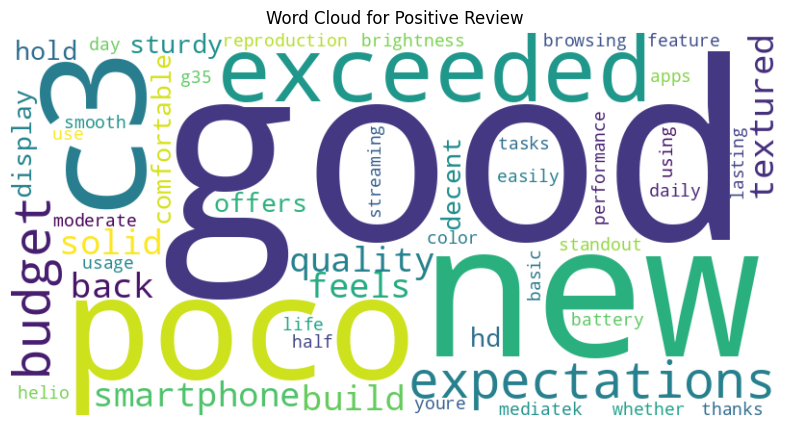

Word cloud generated for this positive review.


In [35]:
if sentiment == "Positive":

    cleaned_review = clean_text(review)

    review_words = word_tokenize(cleaned_review)
    filtered_words = [word for word in review_words if word.lower() not in stop_words]
    filtered_text = ' '.join(filtered_words)


    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          max_words=50).generate(filtered_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud for Positive Review')
    plt.show()
    print("Word cloud generated for this positive review.")
else:
    print("No word cloud generated as the review is not positive.")

In [39]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import numpy as np

In [40]:
training_text = "In recent years, remote work has completely reshaped how many of us go about our daily lives. Instead of long commutes and office desks, people are working from their kitchens, living rooms, or even local coffee shops. It’s made juggling personal responsibilities and professional tasks a bit more manageable for some, while others miss the structure and social side of the traditional workplace. Video calls, messaging apps, and flexible hours have become the norm, and they’re changing not just how we work, but how we live. Still, finding that balance between being “on” for work and having personal time is something many are still figuring out."

In [41]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([training_text])
total_words = len(tokenizer.word_index) + 1

In [42]:
input_sequences = []
for line in training_text.split('.'):
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

In [43]:
max_sequence_len = max([len(seq) for seq in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre')

In [44]:
X = input_sequences[:, :-1]
y = input_sequences[:, -1]

In [45]:
model = Sequential()
model.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
model.add(LSTM(100))
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print(model.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [46]:
print("\nTraining the model...")
model.fit(X, y, epochs=50, verbose=1)


Training the model...
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.0000e+00 - loss: 4.4770
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.0831 - loss: 4.4685
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.0581 - loss: 4.4604
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.0623 - loss: 4.4507
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0404 - loss: 4.4350
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.0675 - loss: 4.3955
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.0644 - loss: 4.3368
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.0529 - loss: 4.3261
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.0633 - loss: 4.2758
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.0581 - loss: 4.2247
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.0642 - loss: 4.2146
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accura

In [47]:
def generate_text(seed_text, next_words, model, tokenizer, max_sequence_len):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)

        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break

        seed_text += " " + output_word

    return seed_text

In [48]:
seed_text = "artificial intelligence"
generated_text = generate_text(seed_text, 10, model, tokenizer, max_sequence_len)
print(f"\nSeed: '{seed_text}'")
print(f"Generated: '{generated_text}'")


Seed: 'artificial intelligence'
Generated: 'artificial intelligence recent recent and and and and and a a manageable'
